# eda

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [35]:
df=pd.read_excel('c:/users/gaurav yadav/downloads/EastWestAirlines (1).xlsx',sheet_name='data')


In [36]:
x=df.iloc[:,1:-1].values


In [37]:
df.info()
#as there is no null values so no need of imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [38]:
def range_x(x):
    return (np.min(x),np.max(x))
for i in range(1,12):
    print(df.columns[i],range_x(df.iloc[:,i]),end=' ')
    print()
# from range of values it is evident that cc1_miles,cc2_miles,cc3_miles,award column doesn't provide much info(less variance)
# so dropping those columns
df1=df.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles','Award?','ID#'],axis=1)

Balance (0, 1704838) 
Qual_miles (0, 11148) 
cc1_miles (1, 5) 
cc2_miles (1, 3) 
cc3_miles (1, 5) 
Bonus_miles (0, 263685) 
Bonus_trans (0, 86) 
Flight_miles_12mo (0, 30817) 
Flight_trans_12 (0, 53) 
Days_since_enroll (2, 8296) 
Award? (0, 1) 


In [39]:
x=df1.values
df1

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [40]:
#feature scaling
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [41]:
#calculating wcss to get optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

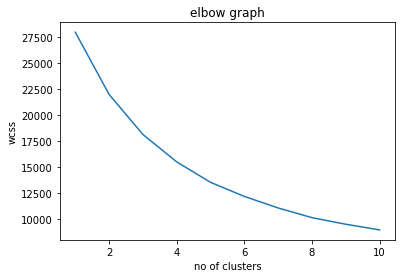

In [42]:
#creating elbow graph
plt.plot(range(1,11),wcss)
plt.title('elbow graph')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [43]:
#elbow occurs at 2 and 5 clusters
kmeans=KMeans(n_clusters=5,random_state=1)
kmeans.fit(x)
df['cluster']=kmeans.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [48]:
df.iloc[:,1:].groupby('cluster').agg('mean').sort_values('Balance')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
1,38059.037530,35.322639,1.456416,1.013923,1.000000,6761.456416,7.632567,179.124697,0.553874,2285.400726,0.240920
4,57985.371119,56.088087,1.690975,1.016606,1.000722,8910.817329,9.198556,214.870758,0.651264,5820.389170,0.335740
3,114012.175439,5543.333333,2.035088,1.000000,1.000000,19196.684211,12.298246,939.771930,2.824561,3872.175439,0.526316
2,153847.047244,74.639108,4.001312,1.010499,1.062992,51475.425197,21.379265,483.671916,1.465879,4915.206037,0.624672
0,191736.335664,471.566434,2.258741,1.027972,1.000000,33093.335664,28.356643,5763.132867,16.769231,4666.412587,0.783217


In [45]:
df.iloc[:,[1,2,3,4,5,-1]].groupby('cluster').agg('mean').sort_values('Balance')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles
cluster,,,,,
1,38059.037530,35.322639,1.456416,1.013923,1.000000
4,57985.371119,56.088087,1.690975,1.016606,1.000722
3,114012.175439,5543.333333,2.035088,1.000000,1.000000
2,153847.047244,74.639108,4.001312,1.010499,1.062992
0,191736.335664,471.566434,2.258741,1.027972,1.000000


# insights
from data it is evident that avg no. of days_since_enroll doesn't mean that no. of miles eligible for award travel will be more.
from data it is evident that avg flight_miles_12mo,Bonus_trans,Bonus_miles  has a direct positive relation with no. of miles eligible for award travel.